In [3]:
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow.keras import optimizers 
from tensorflow.keras import losses 
from tensorflow.keras import datasets 
from tensorflow.keras.models import Sequential 

from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd 

In [35]:
import os 

In [6]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data() 

In [7]:
x_train.shape, y_train.shape 

((60000, 28, 28), (60000,))

In [8]:
x_test.shape, y_test.shape 

((10000, 28, 28), (10000,))

In [18]:
model = Sequential([
    layers.Input(shape = (28,28,1)), 
    layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu'), 
    layers.MaxPooling2D((2,2)), 
    layers.BatchNormalization(), 
    
    layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'), 
    layers.MaxPooling2D((2,2)), 
    layers.BatchNormalization(), 
    
    layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'), 
    layers.MaxPooling2D((2,2)), 
    layers.BatchNormalization(), 
    
    layers.Flatten(), 
    
    layers.Dropout(0.2), 
    
    layers.Dense(1024, activation = 'relu'), 
    layers.Dense(256, activation = 'relu'), 
    layers.Dense(10, activation = 'softmax') 
    
    
]) 

In [19]:
model.compile(optimizer = optimizers.Adam(0.001), loss = losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])   

In [20]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                      

In [22]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 16, workers = 2)     

Epoch 1/20
3750/3750 [==============================] - 28s 5ms/step - loss: 0.1214 - accuracy: 0.9654
Epoch 2/20
3750/3750 [==============================] - 17s 5ms/step - loss: 0.0615 - accuracy: 0.9834
Epoch 3/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0485 - accuracy: 0.9869
Epoch 4/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0366 - accuracy: 0.9900
Epoch 5/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0351 - accuracy: 0.9909
Epoch 6/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0288 - accuracy: 0.9923
Epoch 7/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0262 - accuracy: 0.9933
Epoch 8/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0228 - accuracy: 0.9940
Epoch 9/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0222 - accuracy: 0.9948
Epoch 10/20
3750/3750 [==============================] - 18s 5ms/step - l

In [28]:
hist.__dict__ 

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x1cc51fb4df0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.12138674408197403,
   0.06149164214730263,
   0.04850505292415619,
   0.036554738879203796,
   0.03509896621108055,
   0.028844362124800682,
   0.026168199256062508,
   0.022762030363082886,
   0.022199008613824844,
   0.022571736946702003,
   0.018801704049110413,
   0.018383292481303215,
   0.016965003684163094,
   0.015261849388480186,
   0.01643141359090805,
   0.014881125651299953,
   0.013560101389884949,
   0.012709800153970718,
   0.011313484981656075,
   0.012479403987526894],
  'accuracy': [0.9654499888420105,
   0.9834499955177307,
   0.9869499802589417,
   0.9900166392326355,
   0.9908666610717773,
   0.9922500252723694,
   0.9932666420936584,
   0.9939500093460083,
   0.9947666525840759,
   0.9945666790008545,
   0.9954666495323181,
   0.9956333041191101,
   0.9957000017166138,
   0.9959499835968018,
  

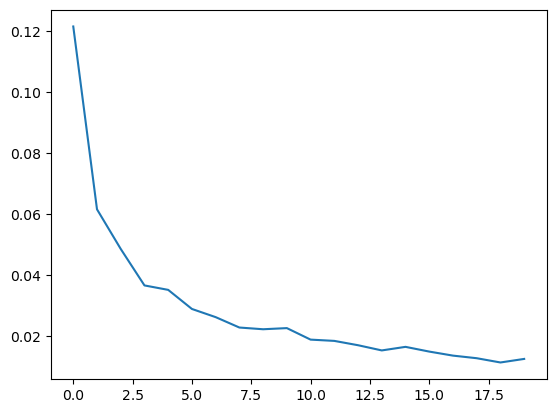

In [26]:
plt.plot(hist.history['loss'])  

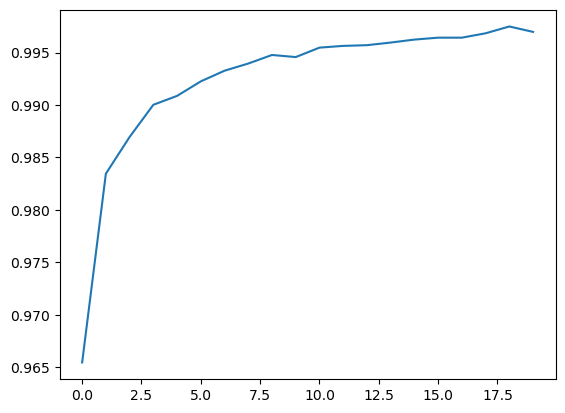

In [27]:
plt.plot(hist.history['accuracy']) 

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)  

313/313 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9914


In [30]:
test_loss 

0.05683128163218498

In [31]:
test_acc 

0.9914000034332275

In [33]:
model.save("digit_classifier.h5")  

In [36]:
os.listdir() 

['.ipynb_checkpoints',
 'basics.ipynb',
 'country_clusters.csv',
 'country_clusters.ipynb',
 'digit_classifier.h5',
 'spam.csv',
 'spam.ipynb',
 'Telco-Customer-Churn.csv',
 'telco_rfc.pkl',
 'Untitled.ipynb']

In [40]:
plt.figure(figsize = (10,10))  

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [41]:
y_pred = model.predict(x_test)   

313/313 [==============================] - 1s 3ms/step


In [44]:
y_pred[0].argmax()  

7

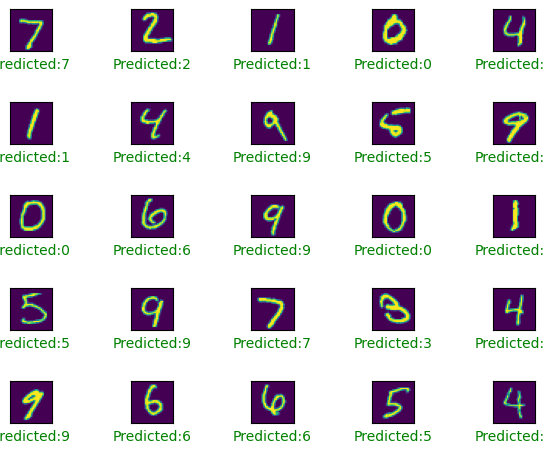

In [49]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(x_test[i]) 
    predicted_label = y_pred[i].argmax() 
    true_label = y_test[i] 
    if true_label == predicted_label:
        color = 'green' 
    else:
        color = 'red' 
    
    plt.xlabel(f"Predicted:{predicted_label}\n", color = color) 
plt.tight_layout() 
plt.show() 